# 01. Data Preprocessing

**Mục đích:** Tiền xử lý dữ liệu Peru cho các mô hình dự báo lạm phát

**Công việc:**
- Load dataset từ `../data/raw/`
- Exploratory Data Analysis (EDA)
- Xử lý missing values
- Feature engineering (nếu cần)
- Train/test split
- Lưu processed data vào `../data/processed/`

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import os

pd.set_option('display.max_columns', None)

In [2]:
try:
    df = pd.read_csv("../data/raw/df_lags_core.csv", index_col=0, parse_dates=True)
except FileNotFoundError:
    df = pd.read_csv("data/raw/df_lags_core.csv", index_col=0, parse_dates=True)

print("Dữ liệu ban đầu:")
display(df.head())
print("\nKích thước:", df.shape)


Dữ liệu ban đầu:


,Core CPI,Headline CPI_lag_1,Headline CPI_lag_2,Headline CPI_lag_3,Terms of Trade - Exports_lag_1,Terms of Trade - Exports_lag_2,Terms of Trade - Exports_lag_3,Terms of Trade - Imports_lag_1,Terms of Trade - Imports_lag_2,Terms of Trade - Imports_lag_3,Chicken Placements (thousands)_lag_1,Chicken Placements (thousands)_lag_2,Chicken Placements (thousands)_lag_3,Private Credit - ME - Consumption (mill US$)_lag_1,Private Credit - ME - Consumption (mill US$)_lag_2,Private Credit - ME - Consumption (mill US$)_lag_3,Private Credit - MN - Consumption (mill S/)_lag_1,Private Credit - MN - Consumption (mill S/)_lag_2,Private Credit - MN - Consumption (mill S/)_lag_3,Private Credit - MN - Mortgage (mill S/)_lag_1,Private Credit - MN - Mortgage (mill S/)_lag_2,Private Credit - MN - Mortgage (mill S/)_lag_3,Capacity Utilization - Food & Beverages_lag_1,Capacity Utilization - Food & Beverages_lag_2,Capacity Utilization - Food & Beverages_lag_3,Electricity Production - Lima (GWh)_lag_1,Electricity Production - Lima (GWh)_lag_2,Electricity Production - Lima (GWh)_lag_3,GDP - Agriculture_lag_1,GDP - Agriculture_lag_2,GDP - Agriculture_lag_3,GDP - Fishing_lag_1,GDP - Fishing_lag_2,GDP - Fishing_lag_3,GDP - Mining_lag_1,GDP - Mining_lag_2,GDP - Mining_lag_3,GDP Growth - Non-Primary Manufacturing_lag_1,GDP Growth - Non-Primary Manufacturing_lag_2,GDP Growth - Non-Primary Manufacturing_lag_3,GDP - Construction_lag_1,GDP - Construction_lag_2,GDP - Construction_lag_3,GDP - Non-Primary Manufacturing_lag_1,GDP - Non-Primary Manufacturing_lag_2,GDP - Non-Primary Manufacturing_lag_3,GDP Growth - Commerce (annual %)_lag_1,GDP Growth - Commerce (annual %)_lag_2,GDP Growth - Commerce (annual %)_lag_3,GDP - Other Services (index 2007=100)_lag_1,GDP - Other Services (index 2007=100)_lag_2,GDP - Other Services (index 2007=100)_lag_3,GDP by Expenditure - Domestic Demand (mill S/ 2007)_lag_1,GDP by Expenditure - Domestic Demand (mill S/ 2007)_lag_2,GDP by Expenditure - Domestic Demand (mill S/ 2007)_lag_3,GDP by Expenditure - Domestic Demand ex. Inventories (mill S/ 2007)_lag_1,GDP by Expenditure - Domestic Demand ex. Inventories (mill S/ 2007)_lag_2,GDP by Expenditure - Domestic Demand ex. Inventories (mill S/ 2007)_lag_3,Private Consumption (mill S/ 2007)_lag_1,Private Consumption (mill S/ 2007)_lag_2,Private Consumption (mill S/ 2007)_lag_3,Private Fixed Investment (mill S/ 2007)_lag_1,Private Fixed Investment (mill S/ 2007)_lag_2,Private Fixed Investment (mill S/ 2007)_lag_3,Public Consumption (mill S/ 2007)_lag_1,Public Consumption (mill S/ 2007)_lag_2,Public Consumption (mill S/ 2007)_lag_3,Public Fixed Investment (mill S/ 2007)_lag_1,Public Fixed Investment (mill S/ 2007)_lag_2,Public Fixed Investment (mill S/ 2007)_lag_3,Fishmeal Price (US$ per ton)_lag_1,Fishmeal Price (US$ per ton)_lag_2,Fishmeal Price (US$ per ton)_lag_3,Coffee Price (US$ per ton)_lag_1,Coffee Price (US$ per ton)_lag_2,Coffee Price (US$ per ton)_lag_3,Copper Price (¢US$ per lb)_lag_1,Copper Price (¢US$ per lb)_lag_2,Copper Price (¢US$ per lb)_lag_3,Gold (US$ per oz troy)_lag_1,Gold (US$ per oz troy)_lag_2,Gold (US$ per oz troy)_lag_3,Wheat Price (US$ per ton)_lag_1,Wheat Price (US$ per ton)_lag_2,Wheat Price (US$ per ton)_lag_3,Corn Price (US$ per ton)_lag_1,Corn Price (US$ per ton)_lag_2,Corn Price (US$ per ton)_lag_3,Soybean Oil Price (US$ per ton)_lag_1,Soybean Oil Price (US$ per ton)_lag_2,Soybean Oil Price (US$ per ton)_lag_3,Crude Oil Price (US$ per barrel)_lag_1,Crude Oil Price (US$ per barrel)_lag_2,Crude Oil Price (US$ per barrel)_lag_3,Real Exchange Rate Index (monthly %)_lag_1,Real Exchange Rate Index (monthly %)_lag_2,Real Exchange Rate Index (monthly %)_lag_3,Monetary Policy Rate_lag_1,Monetary Policy Rate_lag_2,Monetary Policy Rate_lag_3,Reserve Requirement Rate_lag_1,Reserve Requirement Rate_lag_2,Reserve Requirement Rate_lag_3,General Index (base 31/12/91 = 100)_lag_1,General Index (base 31/12/91 = 100)_lag_2,General Index (base 31/12/91 = 100)_lag_3,Selective Index


Kích thước: (140, 190)


In [3]:
print("\nThông tin dữ liệu:")
df.info()

print("\nThống kê mô tả:")
display(df.describe())


Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 140 entries, 2012-05-01 to 2023-12-01
Columns: 190 entries, Core CPI to Unemployment Rate (3-month MA, %)_lag_3
dtypes: float64(190)
memory usage: 208.9 KB

Thống kê mô tả:


,Core CPI,Headline CPI_lag_1,Headline CPI_lag_2,Headline CPI_lag_3,Terms of Trade - Exports_lag_1,Terms of Trade - Exports_lag_2,Terms of Trade - Exports_lag_3,Terms of Trade - Imports_lag_1,Terms of Trade - Imports_lag_2,Terms of Trade - Imports_lag_3,Chicken Placements (thousands)_lag_1,Chicken Placements (thousands)_lag_2,Chicken Placements (thousands)_lag_3,Private Credit - ME - Consumption (mill US$)_lag_1,Private Credit - ME - Consumption (mill US$)_lag_2,Private Credit - ME - Consumption (mill US$)_lag_3,Private Credit - MN - Consumption (mill S/)_lag_1,Private Credit - MN - Consumption (mill S/)_lag_2,Private Credit - MN - Consumption (mill S/)_lag_3,Private Credit - MN - Mortgage (mill S/)_lag_1,Private Credit - MN - Mortgage (mill S/)_lag_2,Private Credit - MN - Mortgage (mill S/)_lag_3,Capacity Utilization - Food & Beverages_lag_1,Capacity Utilization - Food & Beverages_lag_2,Capacity Utilization - Food & Beverages_lag_3,Electricity Production - Lima (GWh)_lag_1,Electricity Production - Lima (GWh)_lag_2,Electricity Production - Lima (GWh)_lag_3,GDP - Agriculture_lag_1,GDP - Agriculture_lag_2,GDP - Agriculture_lag_3,GDP - Fishing_lag_1,GDP - Fishing_lag_2,GDP - Fishing_lag_3,GDP - Mining_lag_1,GDP - Mining_lag_2,GDP - Mining_lag_3,GDP Growth - Non-Primary Manufacturing_lag_1,GDP Growth - Non-Primary Manufacturing_lag_2,GDP Growth - Non-Primary Manufacturing_lag_3,GDP - Construction_lag_1,GDP - Construction_lag_2,GDP - Construction_lag_3,GDP - Non-Primary Manufacturing_lag_1,GDP - Non-Primary Manufacturing_lag_2,GDP - Non-Primary Manufacturing_lag_3,GDP Growth - Commerce (annual %)_lag_1,GDP Growth - Commerce (annual %)_lag_2,GDP Growth - Commerce (annual %)_lag_3,GDP - Other Services (index 2007=100)_lag_1,GDP - Other Services (index 2007=100)_lag_2,GDP - Other Services (index 2007=100)_lag_3,GDP by Expenditure - Domestic Demand (mill S/ 2007)_lag_1,GDP by Expenditure - Domestic Demand (mill S/ 2007)_lag_2,GDP by Expenditure - Domestic Demand (mill S/ 2007)_lag_3,GDP by Expenditure - Domestic Demand ex. Inventories (mill S/ 2007)_lag_1,GDP by Expenditure - Domestic Demand ex. Inventories (mill S/ 2007)_lag_2,GDP by Expenditure - Domestic Demand ex. Inventories (mill S/ 2007)_lag_3,Private Consumption (mill S/ 2007)_lag_1,Private Consumption (mill S/ 2007)_lag_2,Private Consumption (mill S/ 2007)_lag_3,Private Fixed Investment (mill S/ 2007)_lag_1,Private Fixed Investment (mill S/ 2007)_lag_2,Private Fixed Investment (mill S/ 2007)_lag_3,Public Consumption (mill S/ 2007)_lag_1,Public Consumption (mill S/ 2007)_lag_2,Public Consumption (mill S/ 2007)_lag_3,Public Fixed Investment (mill S/ 2007)_lag_1,Public Fixed Investment (mill S/ 2007)_lag_2,Public Fixed Investment (mill S/ 2007)_lag_3,Fishmeal Price (US$ per ton)_lag_1,Fishmeal Price (US$ per ton)_lag_2,Fishmeal Price (US$ per ton)_lag_3,Coffee Price (US$ per ton)_lag_1,Coffee Price (US$ per ton)_lag_2,Coffee Price (US$ per ton)_lag_3,Copper Price (¢US$ per lb)_lag_1,Copper Price (¢US$ per lb)_lag_2,Copper Price (¢US$ per lb)_lag_3,Gold (US$ per oz troy)_lag_1,Gold (US$ per oz troy)_lag_2,Gold (US$ per oz troy)_lag_3,Wheat Price (US$ per ton)_lag_1,Wheat Price (US$ per ton)_lag_2,Wheat Price (US$ per ton)_lag_3,Corn Price (US$ per ton)_lag_1,Corn Price (US$ per ton)_lag_2,Corn Price (US$ per ton)_lag_3,Soybean Oil Price (US$ per ton)_lag_1,Soybean Oil Price (US$ per ton)_lag_2,Soybean Oil Price (US$ per ton)_lag_3,Crude Oil Price (US$ per barrel)_lag_1,Crude Oil Price (US$ per barrel)_lag_2,Crude Oil Price (US$ per barrel)_lag_3,Real Exchange Rate Index (monthly %)_lag_1,Real Exchange Rate Index (monthly %)_lag_2,Real Exchange Rate Index (monthly %)_lag_3,Monetary Policy Rate_lag_1,Monetary Policy Rate_lag_2,Monetary Policy Rate_lag_3,Reserve Requirement Rate_lag_1,Reserve Requirement Rate_lag_2,Reserve Requirement Rate_lag_3,General Index (base 31/12/91 = 100)_lag_1,General Index (base 31/12/91 = 100)_lag_2,General Index (base 31/12/91 = 100)_lag_3,Selective Index

In [4]:
print("\nSố lượng giá trị thiếu mỗi cột:")
display(df.isna().sum())

df = df.ffill() 
print("\nSau khi xử lý missing:")
display(df.isna().sum())


Số lượng giá trị thiếu mỗi cột:


Core CPI                                   0
Headline CPI_lag_1                         0
Headline CPI_lag_2                         0
Headline CPI_lag_3                         0
Terms of Trade - Exports_lag_1             0
                                          ..
Monthly Income (3-month MA)_lag_2          0
Monthly Income (3-month MA)_lag_3          0
Unemployment Rate (3-month MA, %)_lag_1    0
Unemployment Rate (3-month MA, %)_lag_2    0
Unemployment Rate (3-month MA, %)_lag_3    0
Length: 190, dtype: int64


Sau khi xử lý missing:


Core CPI                                   0
Headline CPI_lag_1                         0
Headline CPI_lag_2                         0
Headline CPI_lag_3                         0
Terms of Trade - Exports_lag_1             0
                                          ..
Monthly Income (3-month MA)_lag_2          0
Monthly Income (3-month MA)_lag_3          0
Unemployment Rate (3-month MA, %)_lag_1    0
Unemployment Rate (3-month MA, %)_lag_2    0
Unemployment Rate (3-month MA, %)_lag_3    0
Length: 190, dtype: int64

In [5]:
duplicates = df.duplicated().sum()
print(f"\nSố dòng trùng lặp: {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates()


Số dòng trùng lặp: 0


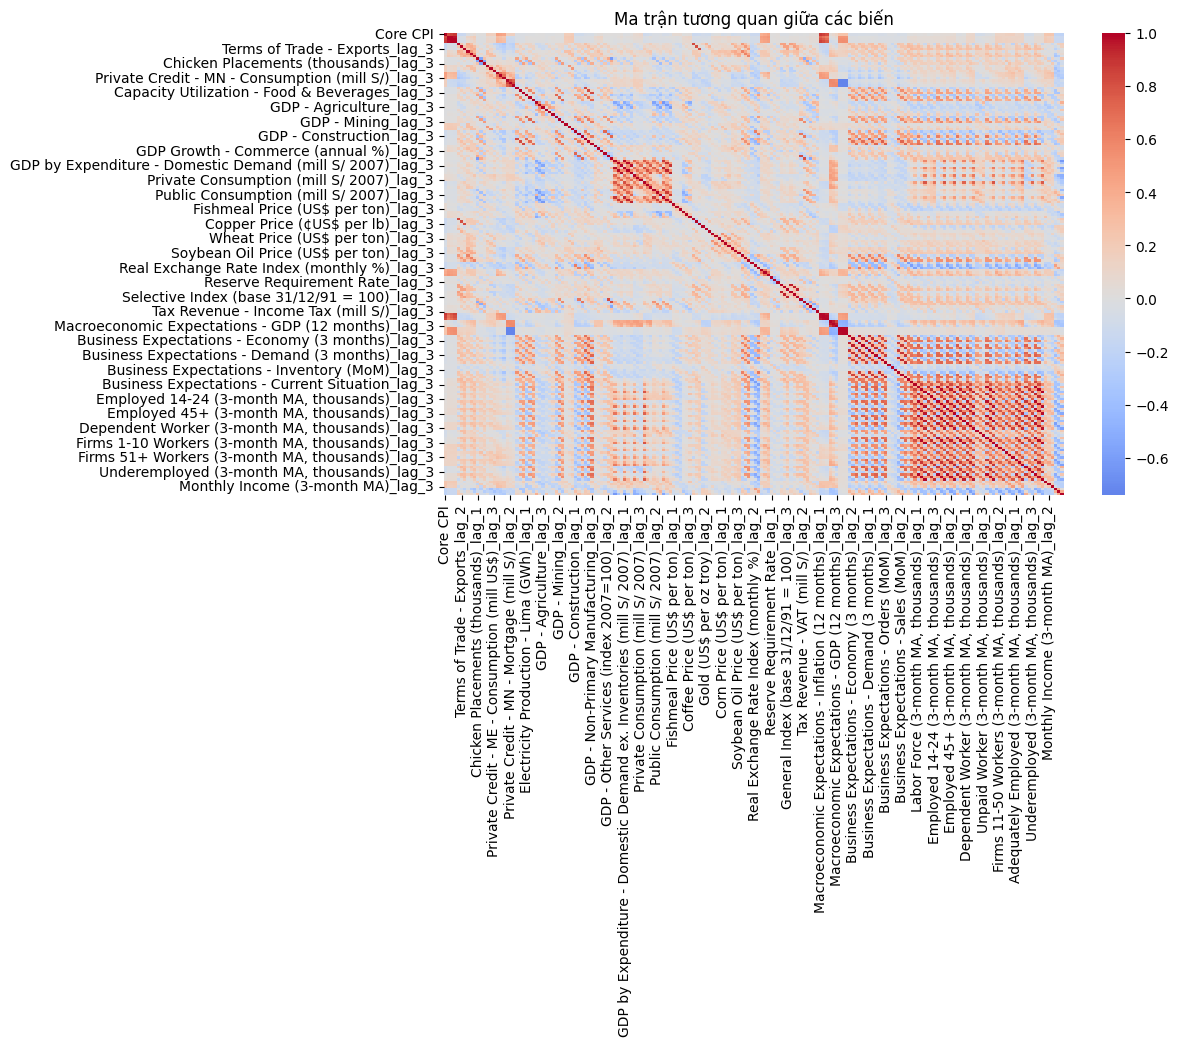

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm', center=0)
plt.title("Ma trận tương quan giữa các biến")
plt.show()

In [7]:
print("\nCác cột hiện có:", df.columns.tolist())

possible_targets = ['Core CPI', 'inflation', 'cpi', 'cpi_yoy', 'v005']
target_col = next((col for col in possible_targets if col in df.columns), df.columns[-1])

print(f"\nBiến mục tiêu được chọn: {target_col}")

if target_col not in df.columns:
    raise ValueError(f"Không tìm thấy cột mục tiêu '{target_col}' trong dữ liệu")


Các cột hiện có: ['Core CPI', 'Headline CPI_lag_1', 'Headline CPI_lag_2', 'Headline CPI_lag_3', 'Terms of Trade - Exports_lag_1', 'Terms of Trade - Exports_lag_2', 'Terms of Trade - Exports_lag_3', 'Terms of Trade - Imports_lag_1', 'Terms of Trade - Imports_lag_2', 'Terms of Trade - Imports_lag_3', 'Chicken Placements (thousands)_lag_1', 'Chicken Placements (thousands)_lag_2', 'Chicken Placements (thousands)_lag_3', 'Private Credit - ME - Consumption (mill US$)_lag_1', 'Private Credit - ME - Consumption (mill US$)_lag_2', 'Private Credit - ME - Consumption (mill US$)_lag_3', 'Private Credit - MN - Consumption (mill S/)_lag_1', 'Private Credit - MN - Consumption (mill S/)_lag_2', 'Private Credit - MN - Consumption (mill S/)_lag_3', 'Private Credit - MN - Mortgage (mill S/)_lag_1', 'Private Credit - MN - Mortgage (mill S/)_lag_2', 'Private Credit - MN - Mortgage (mill S/)_lag_3', 'Capacity Utilization - Food & Beverages_lag_1', 'Capacity Utilization - Food & Beverages_lag_2', 'Capacity 

In [8]:
X = df.drop(columns=[target_col])
y = df[target_col]


In [9]:
split_index = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]


In [10]:
print("\n Kích thước sau chia:")
print(f"Train: {X_train.shape}, Test: {X_test.shape}")


 Kích thước sau chia:
Train: (112, 189), Test: (28, 189)


In [11]:

scaler = StandardScaler()
num_cols = X.select_dtypes(include=['number']).columns
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train[num_cols]),
    columns=num_cols,
    index=X_train.index
)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test[num_cols]),
    columns=num_cols,
    index=X_test.index
)


In [12]:
X_train_scaled[target_col] = y_train.values
X_test_scaled[target_col] = y_test.values

In [13]:
os.makedirs("../data/processed", exist_ok=True)
X_train_scaled.to_csv("../data/processed/train_clean.csv", index=True)
X_test_scaled.to_csv("../data/processed/test_clean.csv", index=True)